In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [ ]:
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [ ]:
disease_df.dropna(axis = 0, inplace = True)
disease_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3751 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         3751 non-null   int64  
 1   age              3751 non-null   int64  
 2   currentSmoker    3751 non-null   int64  
 3   cigsPerDay       3751 non-null   float64
 4   BPMeds           3751 non-null   float64
 5   prevalentStroke  3751 non-null   int64  
 6   prevalentHyp     3751 non-null   int64  
 7   diabetes         3751 non-null   int64  
 8   totChol          3751 non-null   float64
 9   sysBP            3751 non-null   float64
 10  diaBP            3751 non-null   float64
 11  BMI              3751 non-null   float64
 12  heartRate        3751 non-null   float64
 13  glucose          3751 non-null   float64
 14  TenYearCHD       3751 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.9 KB


In [ ]:
disease_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
disease_df.dtypes


,0
Sex_male,int64
age,int64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64
sysBP,float64


In [ ]:
disease_df.describe()


,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
print(disease_df.TenYearCHD.value_counts())


TenYearCHD
0    3179
1     572
Name: count, dtype: int64


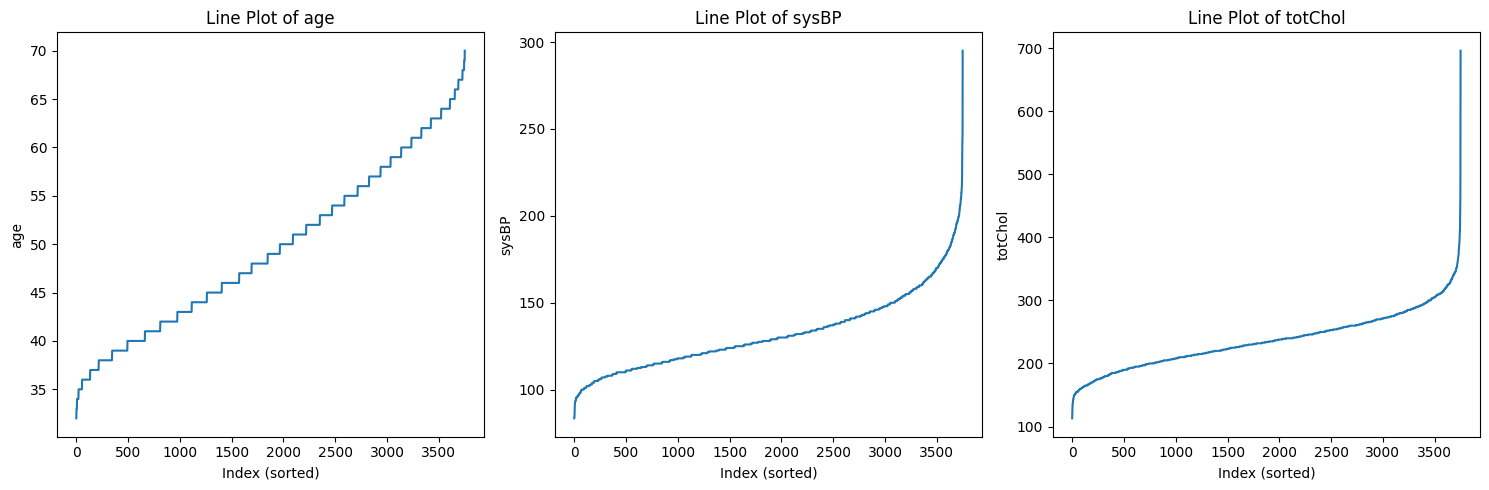

In [ ]:
import matplotlib.pyplot as plt

# List of selected features
selected_columns = ["age", "sysBP", "totChol"]
selected_df = disease_df[selected_columns]

# Line plots for sorted values
plt.figure(figsize=(15, 5))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(1, 3, i)
    plt.plot(selected_df[col].sort_values().values)
    plt.title(f"Line Plot of {col}")
    plt.xlabel("Index (sorted)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


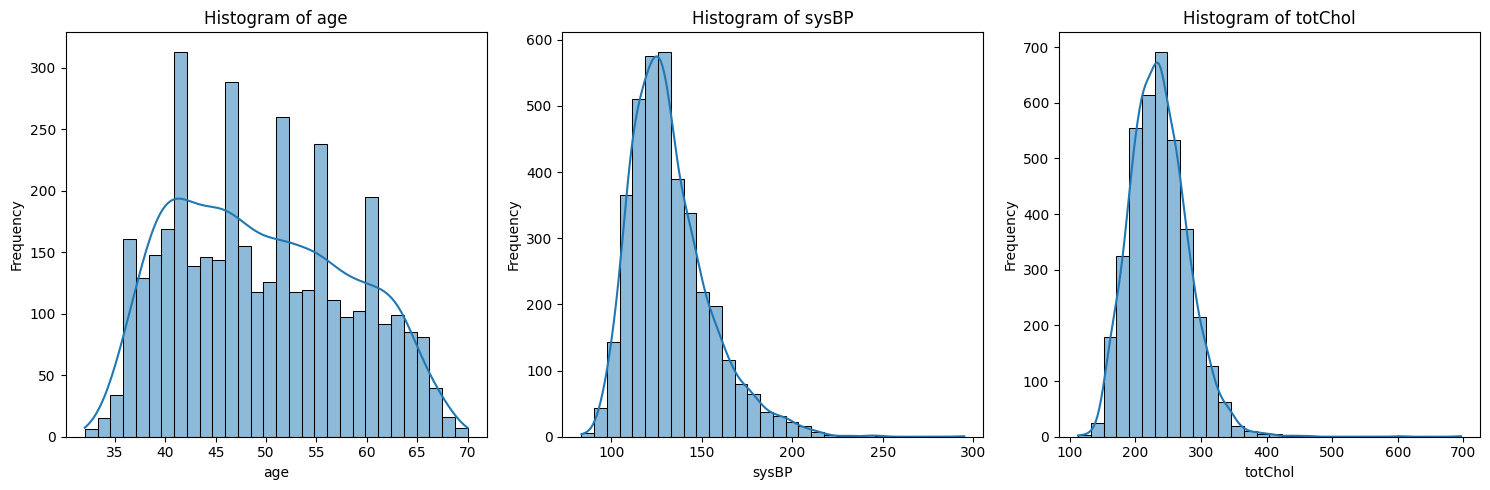

In [ ]:

import seaborn as sns

# Histograms with KDE
plt.figure(figsize=(15, 5))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(disease_df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



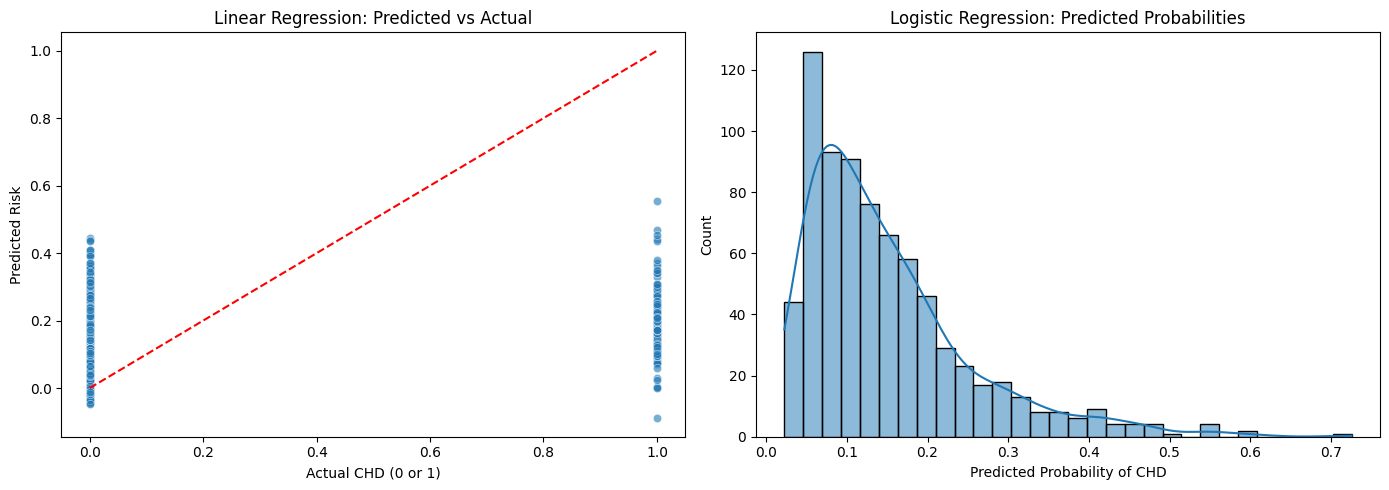

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score

# --- Load and clean data ---
# Assuming your DataFrame is called 'df'
disease_df_clean = disease_df[["age", "sysBP", "totChol", "TenYearCHD"]].dropna()

# Features and target
X = disease_df_clean[["age", "sysBP", "totChol"]]
y = disease_df_clean["TenYearCHD"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# --- Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred_log_class = log_reg.predict(X_test)

# --- Plotting ---
plt.figure(figsize=(14, 5))

# Linear Regression: Predicted vs Actual
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lin, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual CHD (0 or 1)")
plt.ylabel("Predicted Risk")
plt.title("Linear Regression: Predicted vs Actual")

# Logistic Regression: Predicted Probabilities
plt.subplot(1, 2, 2)
sns.histplot(y_pred_log_proba, bins=30, kde=True)
plt.title("Logistic Regression: Predicted Probabilities")
plt.xlabel("Predicted Probability of CHD")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


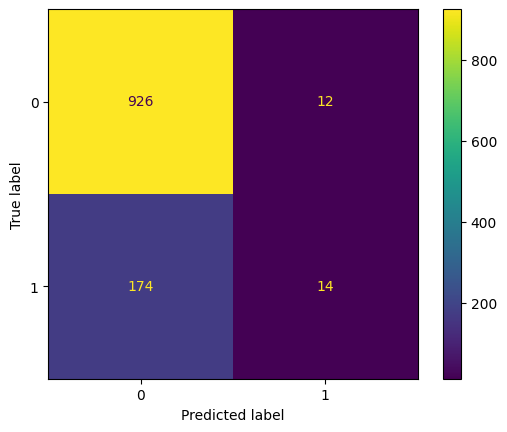

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load the data
df = disease_df

# Step 2: Drop rows with missing values
df = df.dropna()

# Step 3: Define features and target
X = df.drop(columns=['TenYearCHD'])  # features
y = df['TenYearCHD']  # target

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Predict & convert to binary
y_pred = model.predict(X_test)

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
